In [1]:
from mapping import Map
from particle_filter import Particle_Filter
from sensor import Lidar, Encoder, FOG, StereoCamera
from transform import lidar2world
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


In [2]:
n = 1
lidar = Lidar('lidar.csv')
encoder = Encoder('encoder.csv')
fog = FOG('fog.csv')
camera = StereoCamera('left.csv', 'right.csv')
grid_map = Map(0.5, -100, 1400, -1200, 100)
particle_filter = Particle_Filter(n)
trajactory = np.zeros((2, fog.length))
particle_max = None


In [3]:
for i in tqdm(range(fog.length)):
    speed_v = encoder.get_data()
    speed_w = fog.get_data()
    particle_filter.predict(speed_v, speed_w, fog.tau)

    if fog.time > encoder.time:
        lidar_data = lidar.get_data()

        particle_max = particle_filter.update(lidar_data, grid_map)
        trajactory[:, i] = particle_max[:2]

        grid_map.update_map(particle_max, lidar_data)

        encoder.update_idx()
        lidar.update_idx()

    fog.update_idx()

    if i % 100000 == 0:
        grid_map.plot_map(i, n, show=False)

        fig, ax = plt.subplots(figsize=(15, 13))
        ax.set_title(f"trajactory (i={i}, n={n})")
        ax.scatter(trajactory[0, :], trajactory[1, :])
        fig.savefig(f"trajactory_{n}_{i}.png")
        plt.close(fig)


100%|██████████| 1160508/1160508 [16:15<00:00, 1190.25it/s]


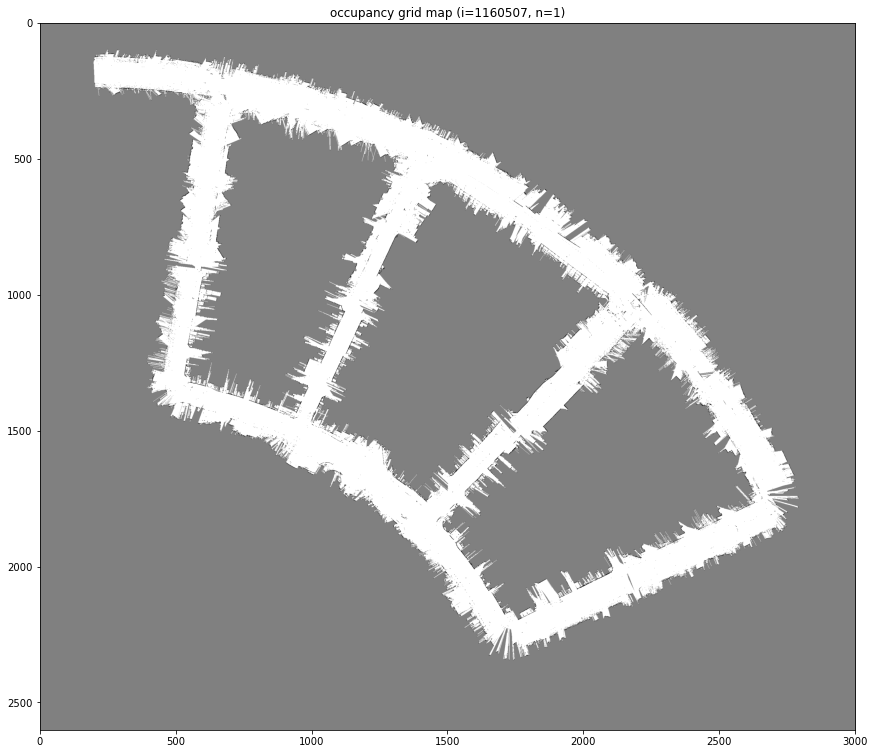

In [4]:
grid_map.plot_map(i, n)


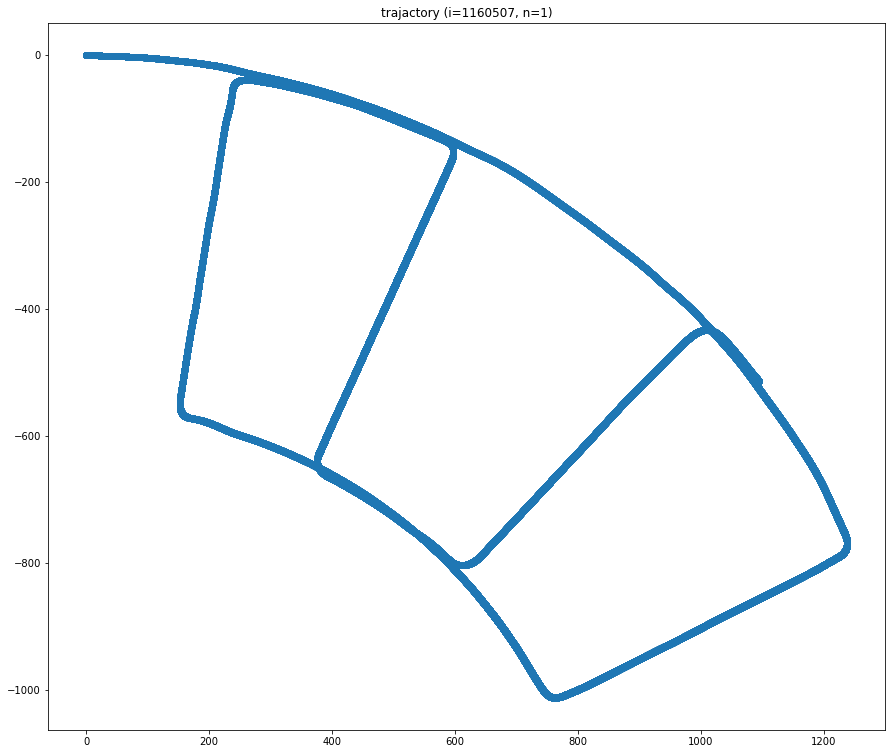

In [5]:
fig, ax = plt.subplots(figsize=(15, 13))
ax.set_title(f"trajactory (i={i}, n={n})")
ax.scatter(trajactory[0, :], trajactory[1, :])
fig.savefig(f"trajactory_{n}_{i}.png")
